In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from autils import load_data
from sklearn.model_selection import train_test_split
tf.keras.backend.clear_session()

In [2]:
def my_softmax(z):   
    e = np.exp(z)
    sum_ = np.sum(e)
    a = e / sum_
    return a

In [3]:
x, y = load_data()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
tf.random.set_seed(10)
model = Sequential([
    Input(shape=(400,)),
    Flatten(),
    Dense(units=32, activation='relu'),
    Dense(units=18, activation='relu'),
    Dense(units=10, activation='softmax')],
                  name='model')

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)      
print(x_train.shape)
print(y_train.shape)

Epoch 1/20


2026-01-03 12:09:31.242588: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2026-01-03 12:09:31.242623: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2026-01-03 12:09:31.242630: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2026-01-03 12:09:31.242653: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-01-03 12:09:31.242669: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2026-01-03 12:09:31.647901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5140 - loss: 1.5146
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8393 - loss: 0.6075
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8785 - loss: 0.4336
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8957 - loss: 0.3714
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9050 - loss: 0.3377
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9107 - loss: 0.3157
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9160 - loss: 0.2987
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9208 - loss: 0.2855
Epoch 9/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9230 - loss: 0.2744
Epoch 10/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9250 - loss: 0.2652
Epoch 11/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9287 - loss: 0.2582
Epoch 12/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy

In [4]:

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy*100:.2f}")
print(f"Test loss: {test_loss:.4f}")

32/32 - 0s - 10ms/step - accuracy: 0.9090 - loss: 0.4151
Test accuracy: 90.90
Test loss: 0.4151


In [5]:
predictions = model.predict(x_test[:20])
predicted_labels = np.argmax(predictions, axis=1)
print("\n--- Model Predictions ---")
print(f"Predicted labels: {predicted_labels}")
print(f"Actual labels:    {y_test[:20]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

--- Model Predictions ---
Predicted labels: [0 8 9 4 6 1 1 1 6 1 9 7 0 7 2 8 0 6 2 0]
Actual labels:    [[0]
 [8]
 [9]
 [4]
 [6]
 [1]
 [1]
 [1]
 [6]
 [1]
 [9]
 [7]
 [0]
 [7]
 [2]
 [8]
 [0]
 [6]
 [2]
 [0]]


In [43]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[0.0909392  0.1778888  0.11282714 0.03700251 0.12745348 0.06569639
  0.15746567 0.14751752 0.04333059 0.03987878]]
Total of predictions: 1.000


In [7]:
print(f"Max value: {x_train.max()}")
print(f"Min value: {x_train.min()}")

Max value: 1.1239340358458016
Min value: -0.11220256331699362


In [22]:
from PIL import Image, ImageOps
def predict_image(image_path, model):
    img = Image.open(image_path).convert('L')
    img = img.resize((20,20))
    img = np.rot90(img, k=-1)
    img_array = np.array(img) / 255.0
    img_final = img_array.reshape(1, 400)

    prediction = model.predict(img_final)
    predicted_digit = np.argmax(prediction)
    print(f"You drew a {predicted_digit}")

predict_image("pixil-frame-0 (1).png", model)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
You drew a 5


I am 97.56% sure this is a: 0


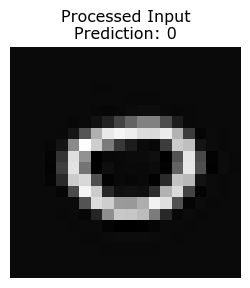

In [10]:
import numpy as np
from PIL import Image, ImageOps
import scipy.ndimage
import matplotlib.pyplot as plt

def predict_digit(image_path, model):
    img = Image.open(image_path).convert('L')
    img = img.resize((20, 20))
    img_array = np.array(img) / 255.0

    cy, cx = scipy.ndimage.center_of_mass(img_array)
    if np.isnan(cy): cy, cx = 10.0, 10.0 # Handle empty image
    shift_y, shift_x = 10.0 - cy, 10.0 - cx
    img_centered = scipy.ndimage.shift(img_array, shift=[shift_y, shift_x], cval=0.0)

    img_final = img_centered.T 
    
    prediction = model.predict(img_final.reshape(1, 400), verbose=0)
    predicted_digit = np.argmax(prediction)
    confidence = np.max(prediction)

    print(f"I am {confidence*100:.2f}% sure this is a: {predicted_digit}")
    
    plt.figure(figsize=(3,3))
    plt.imshow(img_final.reshape(20, 20), cmap='gray')
    plt.title(f"Processed Input\nPrediction: {predicted_digit}")
    plt.axis('off')
    plt.show()

predict_digit("pixil-frame-0 (1).png", model)

In [16]:
print(model)

<Sequential name=model, built=True>


In [11]:
model.save('digit-guesser-softmax.keras')